# Факторный анализ

*Использованы материалы [курса](https://compscicenter.ru/courses/data-mining-python2/)*

Суть: вместо разных переменных, описывающих наши данные, получить меньшее количество факторов (несуществующих факторов! факторы = представители наших данных)

Интересное: эти факторы отсутствуют в исходных данных, но порой можно найти новое и удивительное

Глобальные задачи (не только наши):

1. Сокращение числа переменных (рекомендательные системы - второе дыхание факторного анализа)
2. Измерение неизмеримого (!)
3. Проецирование данных
4. Выявление групп взаимосвязанныых переменных (помогает лучше понять связи между данными, даже если корреляции (линейные зависимости между данными) слабые
5. Преодоление мультиколинеарности в регрессионном анализе (когда нужно оставить только один - самый коррелирующий показатель, а совместно коррелирующие убрать)

*Бытовой пример факторного анализа: размер одежды*

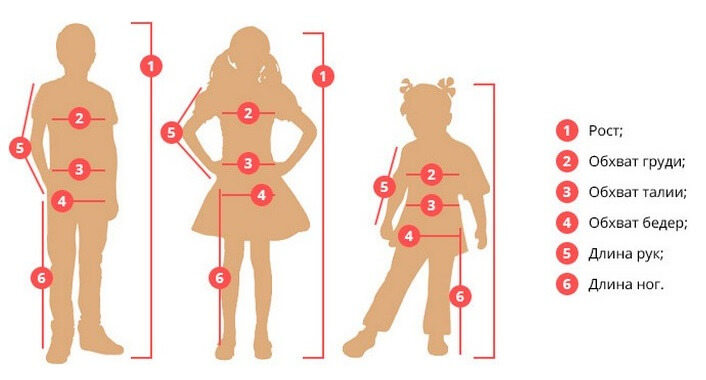

*Еще один пример*

![paremetri.jpg](https://d33wubrfki0l68.cloudfront.net/7a7645db2b38b336ead86c1485f36fab82871c0a/00027/static/uploads/factor-analysis.webp)

## Измерение неизмеримого?
- измерить силу любви
- измерить отношение пациентов к доктору
- удовлетворенность сортом кофе
- приверженность к курению
- лояльность торговой марке
- вероятность разорения фирмы...

### Но! Есть и критика факторного анализа

- наша модель никогда не будет единственной
- злоупотребление интерпретацией :)

# Шаги в процессе:

- построить матрицу корреляций
- стандартизировать данные
- выделить факторы
- проверть факторные остатки (их дисперсии)

In [1]:
# все импорты разом
#!pip install factor-analyzer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer

Будем анализировать поведение самцов корюшки
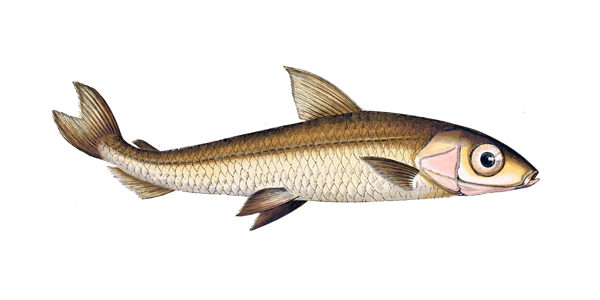

* LUNGES Количество нападений (удары) на модель самца.
* BITES Количество нападений (укусы) на модель самца.
* ZIGZAGS Плавание зигзагом, которое является частью поведения, направленного на привлечение самок.
* NEST Действия, связанные с построением гнезда.
* SPINES Число раз, когда топорщился колючий верхний плавник.
* DNEST Суммарная длительность времени, проведенного за построением гнезда.
* BOUT Количество элементов поведения, характеризующих готовность к схватке.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/stickleback.csv', sep=';', decimal=',')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df[['LUNGES', 'BITES', 'ZIGZAGS', 'NEST', 'SPINES', 'DNEST', 'BOUT']]
df

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0
5,217.0,78.0,13.0,1.0,28.0,3.0,57.0
6,173.0,175.0,3.0,0.0,46.0,0.0,73.0
7,119.0,65.0,25.0,1.0,5.0,3.0,10.0
8,174.0,115.0,4.0,0.0,14.0,0.0,304.0
9,67.0,34.0,8.0,2.0,14.0,117.0,23.0


In [ ]:
df.describe()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


In [ ]:
df.corr()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
LUNGES,1.000000,0.688077,-0.139336,-0.164133,0.055567,-0.228568,0.233314
BITES,0.688077,1.000000,-0.042761,-0.148884,0.373382,-0.217563,0.117316
ZIGZAGS,-0.139336,-0.042761,1.000000,0.351894,0.067813,0.091315,-0.160693
NEST,-0.164133,-0.148884,0.351894,1.000000,-0.052538,0.514028,-0.305876
SPINES,0.055567,0.373382,0.067813,-0.052538,1.000000,-0.051099,-0.041483
DNEST,-0.228568,-0.217563,0.091315,0.514028,-0.051099,1.000000,-0.242177
BOUT,0.233314,0.117316,-0.160693,-0.305876,-0.041483,-0.242177,1.000000


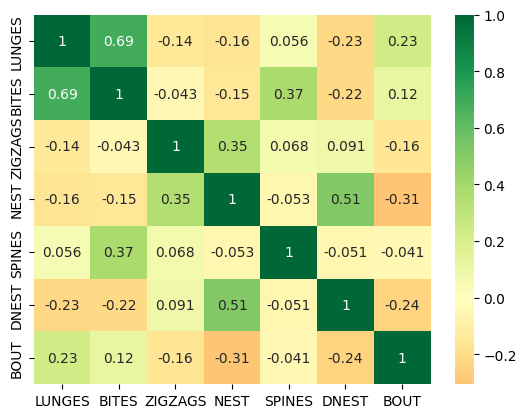

In [ ]:
sns.heatmap(df.corr(), annot=True, center=0, cmap='RdYlGn');

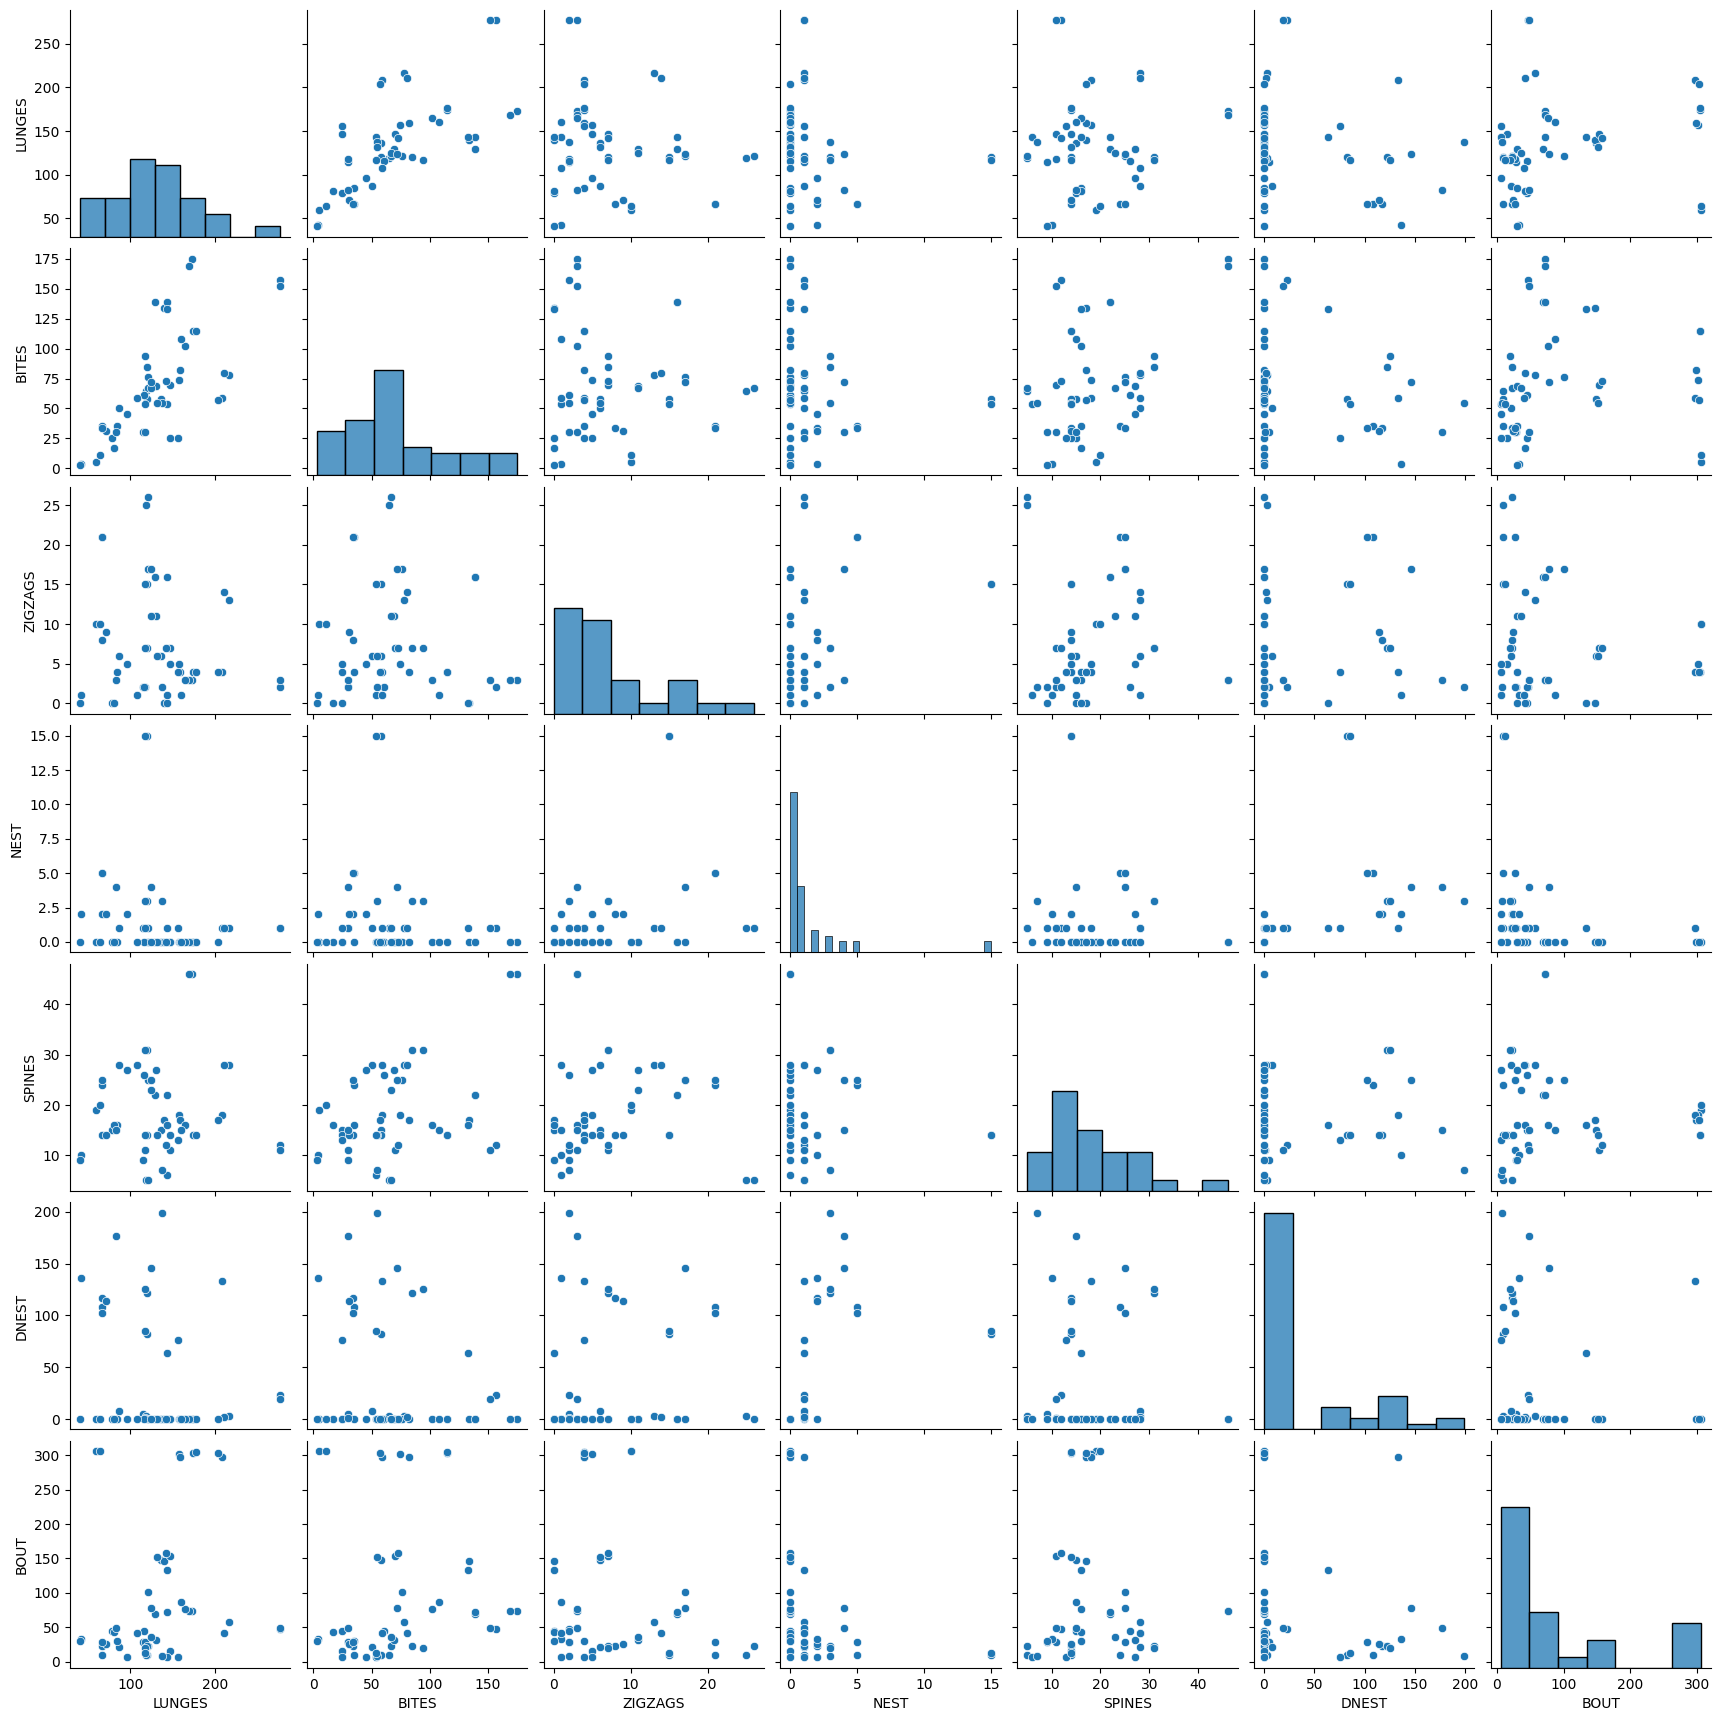

In [ ]:
sns.pairplot(df);

Стандартизация: из каждого наблюдения каждого признака вычитается среднее арифметическое и результат делится на стандартное отклонение этого признака

в основе - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [4]:
# функция для стандартизации
def scale_features(df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    return scaled

In [5]:
df_scaled = preprocessing.scale(df)
df_scaled

array([[-1.03750432e+00, -1.02396939e+00, -1.09743575e+00,
        -4.79669321e-01, -3.96907072e-01, -6.12147874e-01,
        -4.53293904e-01],
       [ 9.57243158e-02, -2.56960792e-01, -1.92679559e-01,
        -4.79669321e-01, -3.96907072e-01, -6.12147874e-01,
         6.00287665e-01],
       [-3.21780969e-01, -9.07755963e-01, -7.95850351e-01,
        -1.43277849e-01, -1.09203081e+00, -5.22807373e-01,
        -6.16957060e-01],
       [-4.34441126e-02,  1.62569667e+00,  1.31524742e+00,
        -4.79669321e-01,  4.14070621e-01, -6.12147874e-01,
        -2.07799170e-01],
       [-2.22374949e-01, -2.56960792e-01,  1.16445472e+00,
         4.56620276e+00, -5.12761028e-01,  8.53036334e-01,
        -8.21536006e-01],
       [ 1.70610184e+00,  2.07892902e-01,  8.62869328e-01,
        -1.43277849e-01,  1.10919436e+00, -5.58543573e-01,
        -3.30546537e-01],
       [ 8.31328866e-01,  2.46243332e+00, -6.45057653e-01,
        -4.79669321e-01,  3.19456557e+00, -6.12147874e-01,
        -1.6688338

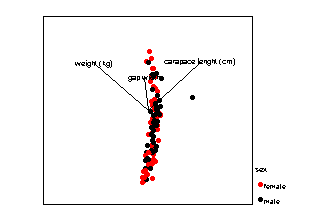

In [6]:
# анализ главных компонент (PCA)
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

pca = PCA(n_components=2) # это число можно менять
pca.fit(df_scaled)
print(pca.explained_variance_ratio_)

# числа показывают процент дисперсии, которой можно объяснить разнообразие данных

[0.32687739 0.20774873]


In [7]:
factors1 = pca.transform(df_scaled)
factors1 # а вот наши значения, которыми можно было бы заменить все исходные данные

array([[ 0.43548142, -1.64669341],
       [-0.57810499, -0.85271451],
       [ 0.4734641 , -1.3749152 ],
       [-0.86464136,  1.23027304],
       [ 3.21866694,  2.24827324],
       [-1.052399  ,  1.38648517],
       [-2.61590674,  2.46582659],
       [ 1.04929916,  0.20661276],
       [-2.13223362, -0.55315166],
       [ 2.02009165, -0.41143077],
       [ 0.36063068, -0.02476881],
       [ 0.97948675,  0.25108044],
       [-2.16370354, -0.53744841],
       [ 0.10543508, -0.91355441],
       [ 2.725405  ,  1.28942123],
       [ 0.4548321 , -1.16706377],
       [ 0.48999679, -1.66916561],
       [ 0.38071857, -1.26181777],
       [-2.37858607,  1.3058442 ],
       [-1.68529819, -0.16401596],
       [ 2.02265315, -0.38262677],
       [-0.13338378, -1.23066028],
       [-1.00578467,  1.30824497],
       [-2.51451239,  2.37038076],
       [-1.00685882,  0.21927711],
       [ 0.22941796, -1.94731033],
       [-1.56765756, -0.86322979],
       [-0.24711031,  0.56673312],
       [-0.42849881,

### Другой вариант факторного анализа

[Документация](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html)

In [8]:
fa = FactorAnalysis(n_components=2)
fa.fit(df_scaled)

pd.DataFrame(fa.components_, columns=df.columns)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,0.715035,0.956805,-0.086423,-0.241141,0.358615,-0.282219,0.166892
1,-0.019296,0.098533,0.367721,0.848657,0.073328,0.513705,-0.329849


В результате получаем новую матрицу корреляций, которая открывает перед нами поиск интерпретаций

Что может скрываться за первым фактором и что за вторым?

In [9]:
pd.Series(fa.noise_variance_, df.columns)
# дисперсия шума (чем больше это число, тем хуже объясняется факторами)

LUNGES     0.487766
BITES      0.076163
ZIGZAGS    0.857251
NEST       0.222906
SPINES     0.866169
DNEST      0.656093
BOUT       0.863093
dtype: float64

Достаем значения факторов

In [10]:
scores = pd.DataFrame(fa.transform(df_scaled), columns=['factor1', 'factor2'])
scores
# что получили, как можно интерпретировать?

,factor1,factor2
0,-0.938788,-0.776068
1,-0.159453,-0.591389
2,-0.818776,-0.458188
3,1.444012,0.094633
4,-0.638620,3.662073
5,0.397292,-0.037810
6,2.342290,0.179116
7,-0.151254,0.045436
8,1.072923,-0.406284
9,-0.908872,0.227997


In [11]:
fa = FactorAnalysis(n_components=3)
fa.fit(df_scaled)
pd.DataFrame(fa.components_, columns=df.columns)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,0.832106,0.851016,-0.180171,-0.390928,0.261270,-0.375792,0.267079
1,0.178973,0.241522,0.331612,0.808428,0.099520,0.441922,-0.266378
2,-0.301530,0.213190,0.145993,-0.051025,0.592552,-0.020361,-0.175361


А как на самом деле определяют оптимальное число признаков?

In [12]:
fa = FactorAnalyzer(rotation='varimax') # вращение
fa.fit(df)
ev, v = fa.get_eigenvalues() # собственные векторы - сложно, математика))

О вращении можно посмотреть у IBM: https://www.ibm.com/docs/ru/spss-statistics/25.0.0?topic=SSLVMB_25.0.0/spss/base/idh_fact_rot.htm

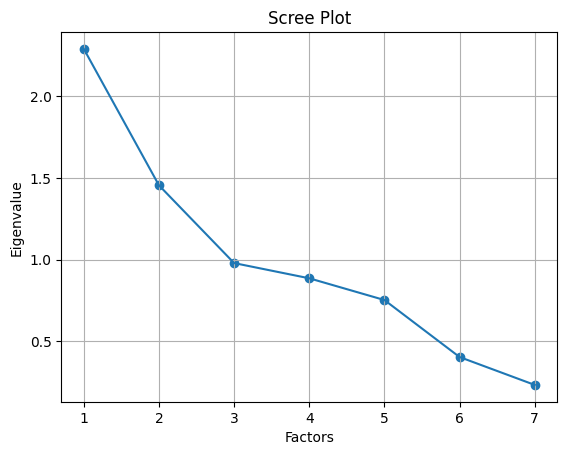

In [13]:
# график каменистой осыпи
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# больше 1 - хорошие факторы, меньше 1 - лишние

# Другой пример, более гуманитарный



Повторите на новом датасете

О данных: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/swiss.html

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/AnnSenina/Other/main/Swiss%20Fertility.csv', sep=';', decimal=',')
df2.head()